# <font color=darkviolet><center> Implementa√ß√£o de Filtro Gaussiano
##  <font color=hotpink><center> Eloisa Maria, Giovana Martins, Maria Clara, Rafaela Luz
    
    

## <font color=lightgreen> Introdu√ß√£o
    
<font color=black> A finalidade deste caderno √© demonstrar a implementa√ß√£o de um filtro Gaussiano, al√©m de realizar uma compara√ß√£o com um filtro linear. Para que seja poss√≠vel a realiza√ß√£o dessa tarefa √© necess√°rio que as imagens que desejamos aplicar os filtros estejam na forma matricial, tendo isso em vista, implementaremos uma fun√ß√£o que realiza esse processo.

## <font color=lightgreen> Bibliotecas
As bibliotecas a serem utilizadas s√£o as seguintes: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2

## <font color=lightgreen> Convertendo imagens em matrizes
Para essa etapa do trabalho foi criada a fun√ß√£o a seguir, ela recebe uma imagem em formato PPM, realiza a leitura do arquivo e armazena os dados em um `nparray`.
-  <font color=dakgreen>Por que usar esse formato de arquivo e o que ele significa?
    
    
<font color=black> PPM ou Mapa de Pixels Port√°til (Portable Pixmap) √© um formato de arquivo que armazena imagens coloridas no formato matricial. Um arquivo em PPM pode estar no modo texto('P3') ou modo bin√°rio('P6'), o modo texto armazena os n√∫meros em ASCII(American Standard Code for Information Interchange) enquanto o bin√°rio armazena em bytes compactos,sendo mais eficiente. O modo em que o arquivo se encotra √© descrito em sua primeira linha, a segunda linha armazena as dimens√µes da imagem. O arquivo em si comporta as informa√ß√µes de cor contidas em cada pixel da imagem individualmente, utilizando o sistema RGB. Na terceira linha do arquivo o maior valor desses pixels √© armazenado, e em seguida os c√≥digos RGB s√£o dispostos em formato matricial seguindo a imagem, como um verdadeiro mapa.
<font color=black> Esse formato √© muito √∫til por ser f√°cil de manipular e editar, atualmente ele √© muito usado como formato intermedi√°rio em imagens pequenas para edi√ß√µes.  
-  <font color=dakgreen>Como a fun√ß√£o funciona?
    

<font color=black> Na fun√ß√£o o local de armazenamento da imagem √© recebido como argumento, ent√£o, na linha 2, o c√≥digo busca arquivo e abre para leitura, o par√¢metro `'rb'` indica que ao abrir o arquivo deve ler em bin√°rio sem realizar modifica√ß√µes.A linha seguinte checa se o arquivo est√° no formato adequado para convers√£o, nesse caso um PPM P6(modo bin√°rio). A linha 5 armazena as dimens√µes da figura em duas vari√°veis e a linha 6 armazena a cor mais forte presente nela, j√° a linha 7 armazena os dados RGB da imagem em outra vari√°vel. A seguir √© usada a fun√ß√£o `frombuffer` da biblioteca `Numpy`, ela transforma um buffer de dados bin√°rios em array, esse array √© reajustado e devolvido pela fun√ß√£o.

In [2]:
def converte_matriz(local):
    with open(local, 'rb') as arquivo:
        cabe√ßalho=arquivo.readline().decode().strip()
        if cabe√ßalho=='P6':
            largura, altura=map(int,arquivo.readline().decode().strip().split())
            cor_mais_forte=int(arquivo.readline().decode().strip())
            dados_imagem=arquivo.read()
            imagem_array=np.frombuffer(dados_imagem, dtype=np.uint8)
            imagem_array = imagem_array.reshape((altura, largura, 3))
        
        else:
            raise ValueError("Formato de imagem n√£o suportado. Para que o c√≥digo seja executado utilize uma imagem em formato PPM.")
            
        return imagem_array

Dimens√µes da imagem: (153, 300, 3)


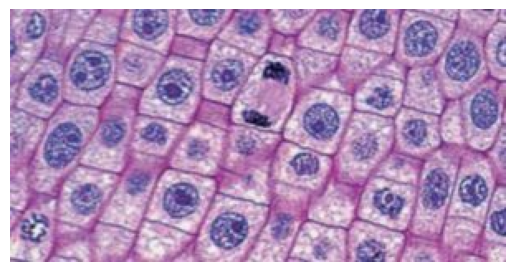

Imagem em forma de array: [[[155 107 157]
  [162 119 165]
  [179 144 186]
  ...
  [194 157 208]
  [197 160 212]
  [168 133 187]]

 [[167 119 169]
  [164 121 167]
  [169 134 176]
  ...
  [198 162 210]
  [193 156 208]
  [161 127 178]]

 [[175 127 177]
  [162 119 165]
  [157 122 162]
  ...
  [194 158 204]
  [180 144 192]
  [140 106 156]]

 ...

 [[161 142 164]
  [171 152 174]
  [178 158 185]
  ...
  [238 213 234]
  [231 201 227]
  [220 187 214]]

 [[132 107 136]
  [128 103 133]
  [119  94 126]
  ...
  [244 219 240]
  [229 199 223]
  [202 169 196]]

 [[165 138 171]
  [166 139 174]
  [156 128 166]
  ...
  [244 219 240]
  [205 175 201]
  [171 138 167]]]


In [3]:
imagem=converte_matriz('imagem para teste 3.ppm')
print("Dimens√µes da imagem:", imagem.shape)
plt.imshow(imagem)
plt.axis('off')
plt.show()
print("Imagem em forma de array:",imagem)

## <font color=lightgreen> Fun√ß√£o de Aplica√ß√£o de filtro
    
   Para entender o funcionamento dos filtros e realizar testes foi implementada uma fun√ß√£o para aplica√ß√£o de filtros.
    
-  <font color=dakgreen>Como a fun√ß√£o funciona?    
    
  
    Essa fun√ß√£o recebe como argumentos o array da imagem original e o array-semente do filtro desejado. O primeiro passo √© criar uma matriz rezuldado onde ser√£o armazenados os valores obtidos ap√≥s a aplica√ß√£o do filtro. A matriz resultado deve ser uma matriz nula com a mesma natureza que a matriz da imagem. Agora √© poss√≠vel aplicar o filtro, para cada uma das dimens√µes do array √© realizada a convolu√ß√£o 2D das matrizes fornecidas utilizando a fun√ß√£o `convolve2d` da biblioteca `scipy.signal`. O resultado da convolu√ß√£o √© armazenado na matriz resultado j√° criada e retornado.
    
-  <font color=dakgreen>O que significam os par√¢metros utilizados na convolu√ß√£o?
    
    
    A fun√ß√£o `convolve2d` possui alguns par√¢metros para retornar a convolu√ß√£o ideal para o seu caso. O par√¢metro `mode` define o formato de devolu√ß√£o da convolu√ß√£o, no caso estamos utilizando o "same" que indica que desejamos que o resultado tenha o mesmo tamanho que a matriz de imagem fornecida. J√° o par√¢metro `boundary` diz respeito √†s bordas da imagem, as opc√µes nesse caso eram preencher os espa√ßos fora da borda com zeros, interpretar a imagem como uma esfera(bordas cont√≠nuas) ou espelhar os valores da borda, a op√ß√£o utilizada foi a √∫ltima citada("symm").
    
- <font color=dakgreen> Como funciona a fun√ß√£o `convolve2d`?
    
    Ela realiza uma convolu√ß√£o bidimensional (2D) que √© uma opera√ß√£o matem√°tica usada para aplicar filtros em imagens, como suaviza√ß√£o ou detec√ß√£o de bordas. Ela funciona deslizando um kernel (matriz pequena) sobre uma matriz maior (imagem), multiplicando os valores correspondentes e somando os resultados para obter um √∫nico valor, que √© ent√£o colocado na posi√ß√£o correspondente da matriz de sa√≠da. O kernel continua a se mover pela imagem at√© cobrir toda a √°rea desejada. Modifica√ß√µes, como o tamanho do kernel, preenchimento (padding) e o passo (stride), podem ajustar o efeito da convolu√ß√£o. Essa t√©cnica √© amplamente utilizada no processamento de imagens para extrair ou modificar caracter√≠sticas espec√≠ficas.

In [4]:
def aplicar_filtro(imagem_array, semente):
    imagem_resultado=np.zeros_like(imagem_array)
    for i in range(3):
        imagem_resultado[:,:,i]=convolve2d(imagem_array[:,:,i],semente,mode='same',boundary='symm')
    return imagem_resultado

## <font color=lightgreen> Exemplo de aplica√ß√£o de filtro
    
<font color=black> Para eluciadar o funcionamento do c√≥digo foi feito um teste com um filtro linear de m√©dia.
    
-  <font color=dakgreen> Filtro de m√©dia:
    
    Um filtro linear de m√©dia √© um filtro passa-baixas que funciona substituindo cada valor pela m√©dia dele pr√≥prio e de seus n vizinhos.
    

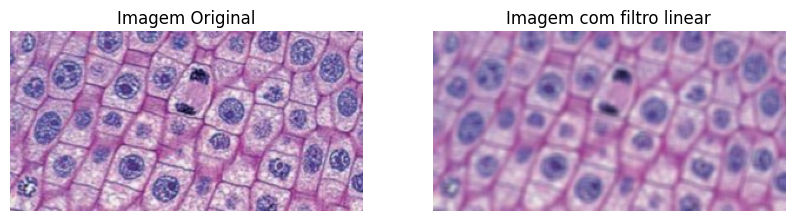

In [5]:
semente_exemplo=np.ones((5, 5)) / 25.0 
imagem_com_filtro=aplicar_filtro(imagem, semente_exemplo)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(imagem)
axes[0].set_title("Imagem Original")
axes[0].axis('off')

axes[1].imshow(imagem_com_filtro)
axes[1].set_title("Imagem com filtro linear")
axes[1].axis('off')

plt.show()

## <font color=lightgreen> Gerando um Kernel Gaussiano
    
A cria√ß√£o de uma semente de fitro gaussiano √© relativamente simples, sendo necess√°ria apenas a transcri√ß√£o da f√≥rmula matem√°tica na forma de c√≥digo. Para gerar a semente somente s√£o utilizados os par√¢metros tamanho e sigma. Dentro da fun√ß√£o o par√¢metro tamanho √© utilizado para calcular o X e o Y e ent√£o a semente √© definida a partir da f√≥rmula:
    
$$
G(x, y) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)
$$


In [6]:
def gerar_semente_gaussiana(tamanho,sigma):
    tamanho_semente=tamanho//2
    x=np.linspace(-tamanho_semente,tamanho_semente,tamanho)
    y=np.linspace(-tamanho_semente,tamanho_semente,tamanho)
    x,y=np.meshgrid(x,y)
    semente=np.exp(-(x**2+y**2)/(2*sigma**2))
    semente=semente/np.sum(semente)
    return semente


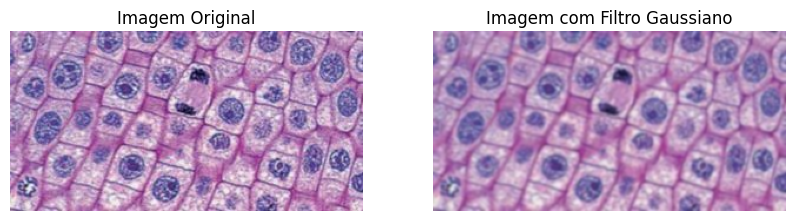

In [7]:
semente_gaussiana_exemplo=gerar_semente_gaussiana(25,1.0)
imagem_com_filtro_g=aplicar_filtro(imagem,semente_gaussiana_exemplo)
fig, axes=plt.subplots(1,2,figsize=(10,5))

axes[0].imshow(imagem)
axes[0].set_title("Imagem Original")
axes[0].axis('off')

axes[1].imshow(imagem_com_filtro_g)
axes[1].set_title("Imagem com Filtro Gaussiano")
axes[1].axis('off')

plt.show()

## <font color=lightgreen> Comparando os filtros 

No espa√ßo abaixo foram plotadas simultaneamente as imagens com ambos os filtros para melhor visualiza√ß√£o das diferen√ßas observadas nos resultados dos processos de tratamento de imagem.

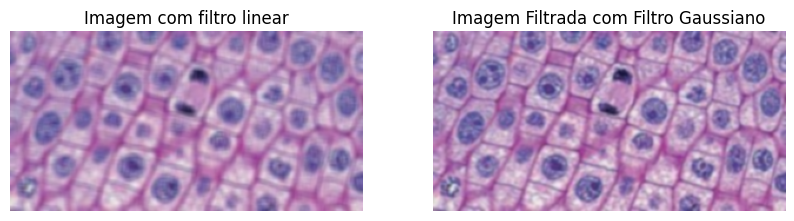

In [8]:
fig, axes=plt.subplots(1,2,figsize=(10,5))

axes[0].imshow(imagem_com_filtro)
axes[0].set_title("Imagem com filtro linear")
axes[0].axis('off')

axes[1].imshow(imagem_com_filtro_g)
axes[1].set_title("Imagem Filtrada com Filtro Gaussiano")
axes[1].axis('off')

plt.show()

## <font color=lightgreen> Filtro Sobel
    
O filtro de Sobel √© uma t√©cnica de detec√ß√£o de bordas usada em processamento de imagens. Ele calcula a derivada da intensidade dos pixels em uma imagem para identificar varia√ß√µes abruptas, ou seja, bordas. O filtro utiliza duas m√°scaras de convolu√ß√£o: uma para detectar mudan√ßas horizontais (gradiente em 
ùë•
x) e outra para mudan√ßas verticais (gradiente em 
ùë¶
y). Essas m√°scaras percorrem a imagem e destacam regi√µes onde a varia√ß√£o da intensidade √© maior. O resultado final √© obtido combinando os dois gradientes usando a f√≥rmula:

$$   
G = \sqrt{G_x^2 + G_y^2}
$$
Produzindo uma imagem de bordas bem definidas. O m√©todo √© amplamente utilizado em vis√£o computacional e processamento digital de imagens.

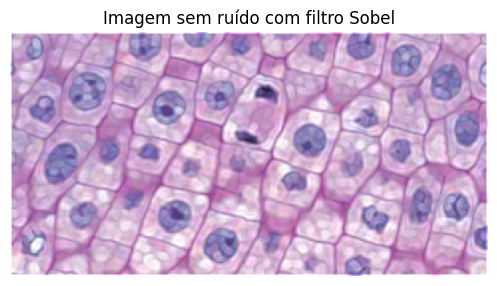

In [9]:
def sobelemimagemcolorida(image):
    sobel_x=np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y=np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    r,g,b=image[:,:,0],image[:,:,1],image[:,:,2]

    grad_x_r=convolve2d(r,sobel_x,boundary='fill',fillvalue=0,mode='same')
    grad_y_r=convolve2d(r,sobel_y,boundary='fill',fillvalue=0,mode='same')

    grad_x_g=convolve2d(g,sobel_x,boundary='fill',fillvalue=0,mode='same')
    grad_y_g=convolve2d(g,sobel_y,boundary='fill',fillvalue=0,mode='same')

    grad_x_b=convolve2d(b,sobel_x,boundary='fill',fillvalue=0,mode='same')
    grad_y_b=convolve2d(b,sobel_y,boundary='fill',fillvalue=0,mode='same')
    
    grad_mag_r=np.sqrt(grad_x_r**2+grad_y_r**2)
    grad_mag_g=np.sqrt(grad_x_g**2+grad_y_g**2)
    grad_mag_b=np.sqrt(grad_x_b**2+grad_y_b**2)

    grad_mag_r=np.clip(grad_mag_r/np.max(grad_mag_r),0,1)
    grad_mag_g=np.clip(grad_mag_g/np.max(grad_mag_g),0,1)
    grad_mag_b=np.clip(grad_mag_b/np.max(grad_mag_b),0,1)
    
    r_with_edges=np.clip(r+grad_mag_r*255,0,255)
    g_with_edges=np.clip(g+grad_mag_g*255,0,255)
    b_with_edges=np.clip(b+grad_mag_b*255,0,255)

    result_image=np.stack((r_with_edges,g_with_edges,b_with_edges),axis=-1)

    return result_image.astype(np.uint8)


imagemsobel=sobelemimagemcolorida(imagem_com_filtro_g)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 2)
plt.title("Imagem sem ru√≠do com filtro Sobel")
plt.imshow(imagemsobel)
plt.axis('off')

plt.tight_layout()
plt.show()


(-0.5, 299.5, 152.5, -0.5)

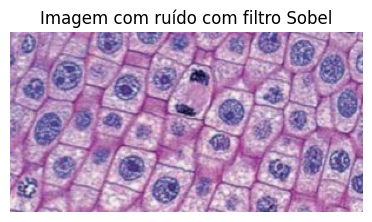

In [11]:
sem_g=sobelemimagemcolorida(imagem)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 2)
plt.title("Imagem com ru√≠do com filtro Sobel")
plt.imshow(imagem)
plt.axis('off')

(-0.5, 299.5, 152.5, -0.5)

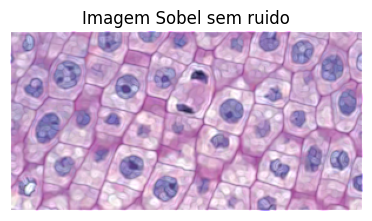

In [13]:
sobel_image=sobelemimagemcolorida(imagem_com_filtro_g)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 2)
plt.title("Imagem Sobel sem ruido")
plt.imshow(sobel_image)
plt.axis('off')

## <font color=lightgreen>Unsharp Mask Laplaciano
    
   <font color=black> Unsharp mask de Laplaciano √© uma t√©cnica de realce de imagem usada para aumentar os detalhes e o contraste. Ela funciona aplicando um filtro Laplaciano, que detecta bordas e √°reas de alta varia√ß√£o de intensidade na imagem. Primeiramente, a imagem original √© suavizada (normalmente com um filtro Gaussiano). Em seguida, o filtro Laplaciano √© aplicado para detectar as bordas, subtraindo a vers√£o suavizada da imagem original. A diferen√ßa √© usada para aumentar as √°reas de bordas, real√ßando os detalhes.

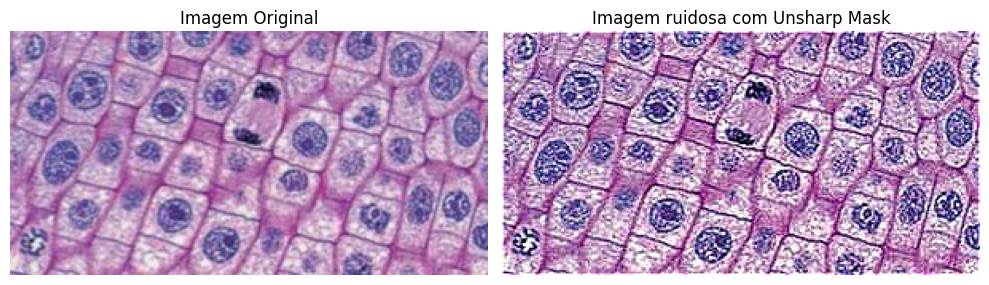

In [14]:
def unsharp_mask_laplaciano(image):
    laplaciano=np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])
    r,g,b=image[:,:,0],image[:,:,1],image[:,:,2]

    lap_r=convolve2d(r,laplaciano,boundary='fill',fillvalue=0, mode='same')
    lap_g=convolve2d(g,laplaciano,boundary='fill',fillvalue=0, mode='same')
    lap_b=convolve2d(b,laplaciano,boundary='fill',fillvalue=0, mode='same')

    r_sharpened=np.clip(r-lap_r,0,255)
    g_sharpened=np.clip(g-lap_g,0,255)
    b_sharpened=np.clip(b-lap_b,0,255)
    
    sharpened_image=np.stack((r_sharpened,g_sharpened,b_sharpened),axis=-1)

    return sharpened_image.astype(np.uint8)

sharpened_image=unsharp_mask_laplaciano(imagem)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(imagem)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagem ruidosa com Unsharp Mask")
plt.imshow(sharpened_image)
plt.axis('off')

plt.tight_layout()
plt.show()


(-0.5, 299.5, 152.5, -0.5)

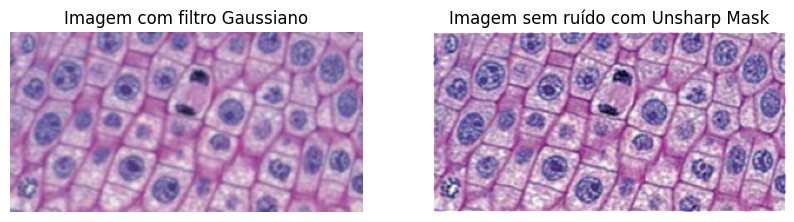

In [15]:
laplaciano_sem_ruido=unsharp_mask_laplaciano(imagem_com_filtro_g)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title("Imagem com filtro Gaussiano")
plt.imshow(imagem_com_filtro_g)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Imagem sem ru√≠do com Unsharp Mask")
plt.imshow(laplaciano_sem_ruido)
plt.axis('off')


## <font color=lightgreen> Refer√™ncias
TECNOLOGIA EM MARKETING DIGITAL. Arquivo PPM: Compreendendo o Formato e Suas Aplica√ß√µes. Dispon√≠vel em: <https://tecnologiaemmarketingdigital.com/arquivo-ppm/>. Acesso em: 31 dez. 2024.



FALCAO, A. X. Filtros Lineares. Dispon√≠vel em: <https://www.ic.unicamp.br/~afalcao/mo443/slides-aula6.pdf>. Acesso em: 31 dez. 2024.


IN√ÅCIO, D. Sobel Operator. Dispon√≠vel em: <https://diegoinacio.github.io/computer-vision-notebooks-page/pages/sobel_operator.html>. Acesso em: 31 dez. 2024.

How does an unsharp mask work? Dispon√≠vel em: <https://stackoverflow.com/questions/2938162/how-does-an-unsharp-mask-work>. Acesso em: 31 dez. 2024.

Unsharp masking using MATLAB. Dispon√≠vel em: <https://www.geeksforgeeks.org/unsharp-masking-using-matlab/>. Acesso em: 31 dez. 2024.

   
    
https://chatgpt.com/